# Task-1         
## Titanic Survival Prediction

In [42]:
import pandas as pd 
import numpy as np

In [43]:
df = pd.read_csv('Titanic-Dataset.csv')
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [44]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [46]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [47]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [48]:
df = df.drop(['Cabin'], axis=1)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [49]:
# Filling age null value with median
df['Age'] = df['Age'].fillna(df['Age'].median())
df.dropna(inplace=True) # Dropping the remaining null values

In [50]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [51]:
# Define age bins and labels
bins = [0, 15, 30, 45, 60, float('inf')]
labels = ['0-15', '16-30', '31-45', '46-60', '60+']

# Create a new column for age groups
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels)

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age Group
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,16-30
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,31-45
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,16-30
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,31-45
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,31-45


In [52]:
print(df['Age Group'].value_counts())

Age Group
16-30    503
31-45    201
0-15      83
46-60     81
60+       21
Name: count, dtype: int64


In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

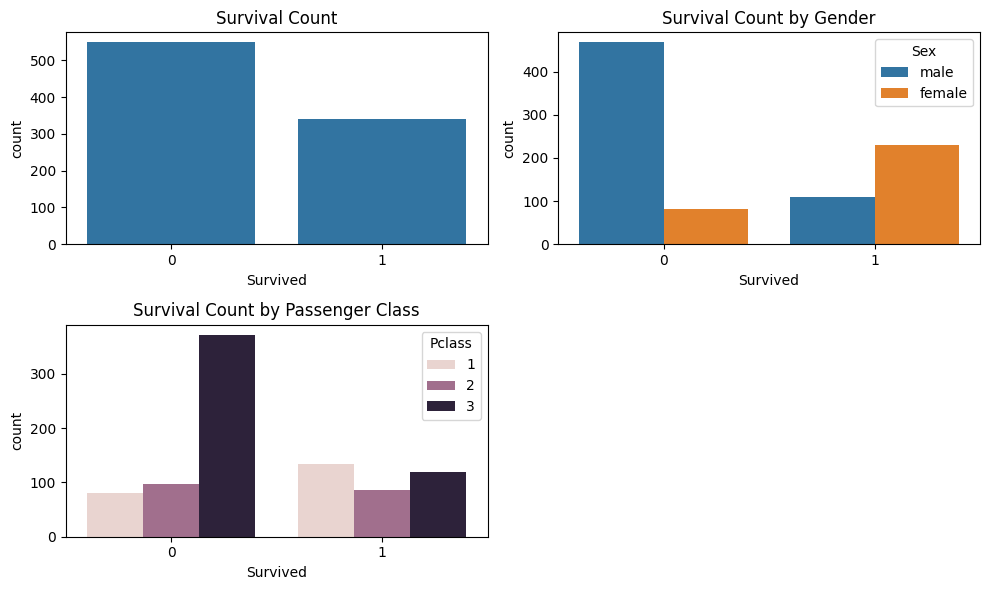

In [54]:
plt.figure(figsize=(10, 6))
# Plot the survival count
plt.subplot(2, 2, 1)
sns.countplot(x='Survived', data=df)
plt.title('Survival Count')
#plt.show()

plt.subplot(2, 2, 2)
# Plot survival rate by gender
sns.countplot(x='Survived', hue='Sex', data=df)
plt.title('Survival Count by Gender')
#plt.show()

plt.subplot(2, 2, 3)
# Plot survival rate by passenger class
sns.countplot(x='Survived', hue='Pclass', data=df)
plt.title('Survival Count by Passenger Class')

plt.tight_layout()
plt.show()


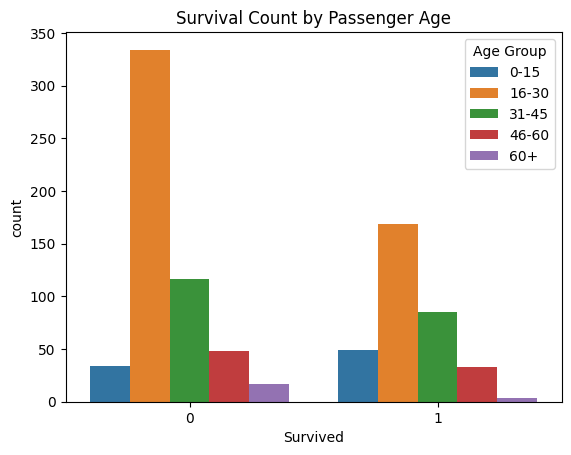

In [55]:
# Plot survival rate by passenger class
sns.countplot(x='Survived', hue='Age Group', data=df)
plt.title('Survival Count by Passenger Age')
plt.show()


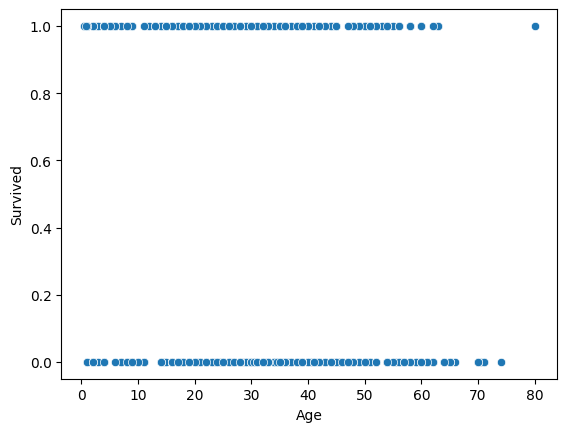

In [56]:
sns.scatterplot(x=df["Age"], y=df["Survived"])
plt.show()

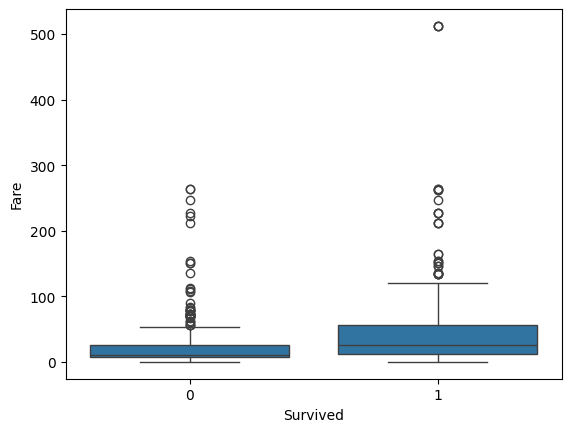

In [57]:
sns.boxplot(x=df["Survived"], y=df["Fare"])
plt.show()

### Interpretation of the Box Plot

- **Fare Distribution Across Survival Status**  
  - X-axis: **Survived (0 = Not Survived, 1 = Survived)**
  - Y-axis: **Fare paid by passengers**  

- **Median Fare**  
  - **Higher median fare for survivors (1)** than non-survivors (0).  
  - Suggests passengers who paid higher fares had a **better survival chance**.  

- **Interquartile Range (IQR) & Spread**  
  - **Survivors (1) have a wider IQR**, meaning more variation in fares.  
  - **Non-survivors (0) have a smaller IQR**, meaning fares were mostly lower.  

- **Whiskers & Outliers**  
  - Many **outliers** in both groups, especially among survivors.  
  - One **extreme outlier (~500 fare)** suggests some passengers paid exceptionally high fares.  

- **Conclusion**  
  - Higher fares are associated with **higher survival rates**.  
  - Many non-survivors **paid lower fares**, likely from lower-class cabins.  
  - **Wealthier passengers (who paid more) had better access to lifeboats**.


In [58]:
#Selecting relevant features
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
df = df[features + ['Survived']]

# Handling missing values
imputer = SimpleImputer(strategy='most_frequent')
df[['Age', 'Embarked']] = imputer.fit_transform(df[['Age', 'Embarked']])

# Encoding categorical variables
encoder = LabelEncoder()
df['Sex'] = encoder.fit_transform(df['Sex'])
df['Embarked'] = encoder.fit_transform(df['Embarked'])

# Splitting data into training and testing sets
X = df[features]
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Random Forest

In [59]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],  
    'max_depth': [4, 6, 8, 10],  
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 4],  
    'bootstrap': [True, False]
}

rf = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best model
best_rf = grid_search.best_estimator_

In [61]:
from sklearn.metrics import confusion_matrix

# predictions on test set
y_pred = best_rf.predict(X_test)

# Evaluating model performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Best Random Forest Model Accuracy: {accuracy:.4f}')
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Best Random Forest Model Accuracy: 0.7865

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.83      0.83       109
           1       0.73      0.71      0.72        69

    accuracy                           0.79       178
   macro avg       0.78      0.77      0.77       178
weighted avg       0.79      0.79      0.79       178


Confusion Matrix:
 [[91 18]
 [20 49]]


## XGBoost

In [62]:
#Selecting relevant features
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
df = df[features + ['Survived']]

# Encoding categorical variables
encoder = LabelEncoder()
df['Sex'] = encoder.fit_transform(df['Sex'])
df['Embarked'] = encoder.fit_transform(df['Embarked'])

# Feature Engineering
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1  # Include self

# Splitting the dataset
X = df.drop(columns=['Survived'])
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from xgboost import XGBClassifier

# Converting 'Age' column to numeric
X_train['Age'] = pd.to_numeric(X_train['Age'])
X_test['Age'] = pd.to_numeric(X_test['Age'])

# Training XGBoost Model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

# Predictions
y_pred = xgb_model.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7978
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.82      0.83       109
           1       0.73      0.77      0.75        69

    accuracy                           0.80       178
   macro avg       0.79      0.79      0.79       178
weighted avg       0.80      0.80      0.80       178



c:\Users\stuty\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:24:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 300, 500],  
    'max_depth': [3, 5, 7],  
    'learning_rate': [0.01, 0.1, 0.2],  
    'subsample': [0.8, 1.0],  
    'colsample_bytree': [0.8, 1.0]
}

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

grid_search = GridSearchCV(xgb, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Finding Best model
best_xgb = grid_search.best_estimator_

# Predictions
y_pred_best = best_xgb.predict(X_test)

# Evaluating the best model
accuracy_best = accuracy_score(y_test, y_pred_best)
print(f"Improved Accuracy: {accuracy_best:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred_best))

c:\Users\stuty\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:24:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Improved Accuracy: 0.8146
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.86      0.85       109
           1       0.77      0.74      0.76        69

    accuracy                           0.81       178
   macro avg       0.81      0.80      0.80       178
weighted avg       0.81      0.81      0.81       178



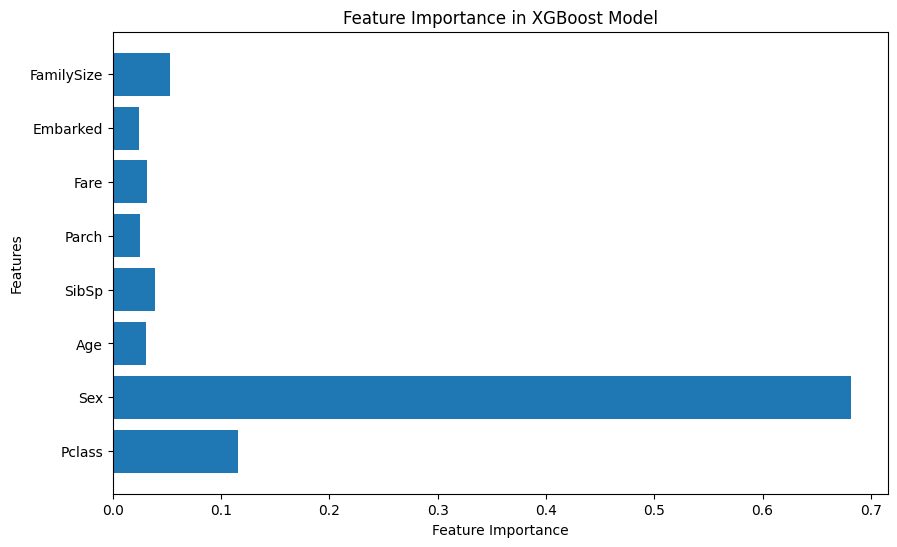

In [ ]:
# Plotting feature importance
plt.figure(figsize=(10, 6))
plt.barh(X_train.columns, best_xgb.feature_importances_)
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance in XGBoost Model")
plt.show()

we can see that after hyperparameter tuning XGBoost has given an accuracy of 81% and the imporatant feature here is 'Sex'.

---